In [1]:
# 1.1 – Importar librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.2 – Cargar el archivo Excel
ts = pd.read_excel("exports/ts_final.xlsx")

# 1.3 – Vista rápida
print("Dimensiones:", ts.shape)
print("\nTipos de datos:")
print(ts.dtypes)

print("\nPrimeras 5 filas:")
display(ts.head())

print("\nResumen estadístico de variables numéricas:")
display(ts.describe().T)

print("\nValores nulos por columna:")
print(ts.isna().sum())


Dimensiones: (108, 10)

Tipos de datos:
ANO                            int64
MES                            int64
ventas_gasolina                int64
ventas_diesel                  int64
ventas_electrico               int64
ventas_otros                   int64
PIB_nominal                  float64
precio_gasolina_eur_litro    float64
ev_incentivos_mEur           float64
restriccion_score              int64
dtype: object

Primeras 5 filas:


,ANO,MES,ventas_gasolina,ventas_diesel,ventas_electrico,ventas_otros,PIB_nominal,precio_gasolina_eur_litro,ev_incentivos_mEur,restriccion_score
0,2015,1,22787,48250,55,0,1.206165e+12,1.130435,0.0,0
1,2015,2,31283,58821,51,0,1.206165e+12,1.187365,0.0,0
2,2015,3,42380,73040,162,0,1.206165e+12,1.258910,0.0,0
3,2015,4,31291,54507,111,0,1.206165e+12,1.285613,0.0,0
4,2015,5,36275,61082,118,0,1.206165e+12,1.314428,0.0,0



Resumen estadístico de variables numéricas:


,count,mean,std,min,25%,50%,75%,max
ANO,108.0,2.019000e+03,2.594026e+00,2.015000e+03,2.017000e+03,2.019000e+03,2.021000e+03,2.023000e+03
MES,108.0,6.500000e+00,3.468146e+00,1.000000e+00,3.750000e+00,6.500000e+00,9.250000e+00,1.200000e+01
ventas_gasolina,108.0,5.432270e+04,1.739670e+04,2.887000e+03,4.263900e+04,5.432050e+04,6.524000e+04,9.389900e+04
ventas_diesel,108.0,3.852796e+04,1.787649e+04,1.794000e+03,2.106225e+04,3.702850e+04,5.308000e+04,7.489000e+04
ventas_electrico,108.0,1.604972e+03,1.538109e+03,5.100000e+01,4.325000e+02,1.019500e+03,2.236250e+03,6.582000e+03
ventas_otros,108.0,1.888889e+00,4.280653e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.400000e+01
PIB_nominal,108.0,1.380410e+12,1.218543e+11,1.206165e+12,1.289784e+12,1.403496e+12,1.446498e+12,1.620091e+12
precio_gasolina_eur_litro,108.0,1.350977e+00,2.205756e-01,1.078875e+00,1.188771e+00,1.299499e+00,1.441777e+00,2.108957e+00
ev_incentivos_mEur,108.0,1.901000e+02,2.604726e+02,0.000000e+00,1.660000e+01,4.500000e+01,3.500000e+02,8.000000e+02
restriccion_score,108.0,4.444444e+00,3.036640e+00,0.000000e+00,2.000000e+00,4.000000e+00,7.000000e+00,9.000000e+00



Valores nulos por columna:
ANO                          0
MES                          0
ventas_gasolina              0
ventas_diesel                0
ventas_electrico             0
ventas_otros                 0
PIB_nominal                  0
precio_gasolina_eur_litro    0
ev_incentivos_mEur           0
restriccion_score            0
dtype: int64


In [3]:
# --- Creación del DatetimeIndex (Paso Crucial) ---
# Creamos una nueva columna 'fecha' combinando 'ANO' y 'MES'.
# El formato 'YYYY-MM' se completa con el día 1 por defecto.
ts['fecha'] = pd.to_datetime(ts['ANO'].astype(str) + '-' + ts['MES'].astype(str))

# Establecemos esta nueva columna 'fecha' como el índice del DataFrame.
ts.set_index('fecha', inplace=True)

In [86]:
# Eliminamos las columnas originales 'ANO' y 'MES' que ya no son necesarias.
ts.drop(['ANO', 'MES'], axis=1, inplace=True)

# --- Verificación ---
# Comprobamos que el índice se ha creado correctamente y visualizamos el resultado.
print("Información del DataFrame con el nuevo índice de fecha:")
print(ts.info())
print("\nÚltimas 5 filas del DataFrame para ver el final de la serie:")
print(ts.tail())

Información del DataFrame con el nuevo índice de fecha:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 2015-01-01 to 2023-12-01
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ventas_gasolina            108 non-null    int64  
 1   ventas_diesel              108 non-null    int64  
 2   ventas_electrico           108 non-null    int64  
 3   ventas_otros               108 non-null    int64  
 4   PIB_nominal                108 non-null    float64
 5   precio_gasolina_eur_litro  108 non-null    float64
 6   ev_incentivos_mEur         108 non-null    float64
 7   restriccion_score          108 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 7.6 KB
None

Últimas 5 filas del DataFrame para ver el final de la serie:
            ventas_gasolina  ventas_diesel  ventas_electrico  ventas_otros  \
fecha                                                             

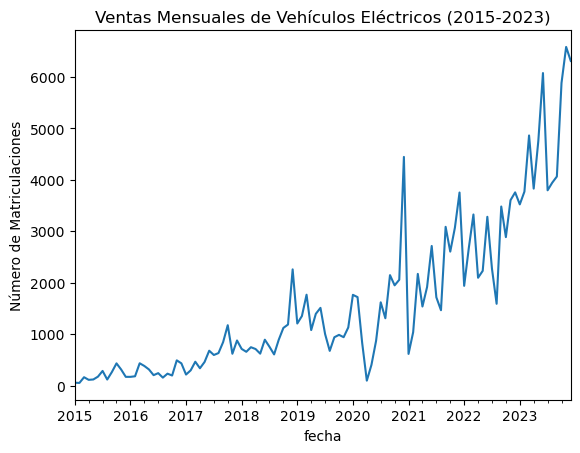

In [88]:
# Graficamos la variable objetivo para confirmar visualmente la correcta carga.
ts['ventas_electrico'].plot(title='Ventas Mensuales de Vehículos Eléctricos (2015-2023)')
plt.ylabel('Número de Matriculaciones')
plt.show()